For this assignment, I examine the Census Income dataset available at the UCI Machine Learning Repository.
I aim to predict whether an individual’s income will be greater than $50,000 per year based on several 
attributes from the census data.

The Census Income dataset has many entries. Each entry contains the following information
about an individual: 
age, workclass, fnlwgt, education, education_num, marital-status, occupation, relationship,
race, gender, capital-gain,	capital-loss, hours-per-week, native-country, income-per-anum

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import klib
import seaborn as sns
import warnings
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
warnings.filterwarnings("ignore")

%matplotlib inline


Load data

In [42]:
census_txt=pd.read_csv("https://raw.githubusercontent.com/shahin28jan/data/main/census.data")

Data convert into csv file

In [43]:
census_txt.to_csv(r"C:\Users\mohdalwaz\Documents\shahin\ineuron\EDA\census_csv.csv",index=None)

Read csv file and give them columns name because data does not have columns name

In [44]:
census_csv = pd.read_csv(r"C:\Users\mohdalwaz\Documents\shahin\ineuron\EDA\census_csv.csv", names = ["age",	"workclass", "fnlwgt",	"education", "education_num", "marital-status",	"occupation", "relationship", "race","gender", "capital-gain",	"capital-loss", "hours-per-week", "native-country",	"income-per-anum"])

Data Investigation                                                    

Checking data first 30 rows

In [45]:
census_csv.head(30)

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income-per-anum
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Basic Information

In [46]:
census_csv.shape

(32561, 15)

In [47]:
census_csv.info()
print(pd.value_counts(census_csv.dtypes))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   education_num    32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income-per-anum  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
object    9
int64     6
dtype: int64


In [48]:
census_csv.describe()

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observatio:
   1.The dataset contains 32561 rows and 15 columns
   2.There are 9 categorical features and 6 numeric features

In [49]:
# make a copy of data
census_copy= census_csv.copy()   

First we check the null value is present or not in this data set.

In [50]:
census_copy.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
education_num      0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income-per-anum    0
dtype: int64

As we see there is no null value present in the data set.

Checking unique values

In [51]:
census_copy["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [52]:
# Above data set having some missing value i.e "?" (check by unique key), so need to check in how many columns having this missing value.

In [53]:
census_copy[census_copy == ' ?'].count()

age                   0
workclass          1836
fnlwgt                0
education             0
education_num         0
marital-status        0
occupation         1843
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
income-per-anum       0
dtype: int64

Obervation: As we see columns 'workclass', 'occupation' and 'native-country' have ' ?', so we have to replace it with nun.

In [54]:
unique_columns=["workclass", "occupation", "native-country"]
for i in unique_columns:
    census_copy[i]=census_copy[i].str.replace('?', 'nun')

Now we clean the data set by using klib liberary

In [55]:
census_clean = klib.data_cleaning(census_copy)

Shape of cleaned data: (32537, 15) - Remaining NAs: 0


Dropped rows: 24
     of which 24 duplicates. (Rows (first 150 shown): [4881, 5104, 9171, 11631, 13084, 15059, 17040, 18555, 18698, 21318, 21490, 21875, 22300, 22367, 22494, 25872, 26313, 28230, 28522, 28846, 29157, 30845, 31993, 32404])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 3.04 MB (-81.5%)



In this data set 24 duplicate rows was present. Now our data is clean 

In [56]:
census_clean.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_per_anum
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [57]:
census_clean.shape

(32537, 15)

There are 32537 rows and 15 columns in this data set

In [58]:
census_clean.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [59]:
# In above description the average age is 38.58 and the average of education is 10.08 which is good
# that showing mostly of the people are above high school grade. Average of working hour is showing 40.44.
# In USA working days are five that means people waorks 8 hours in a day. 

In [60]:
census_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              32537 non-null  int8    
 1   workclass        32537 non-null  category
 2   fnlwgt           32537 non-null  int32   
 3   education        32537 non-null  category
 4   education_num    32537 non-null  int8    
 5   marital_status   32537 non-null  category
 6   occupation       32537 non-null  category
 7   relationship     32537 non-null  category
 8   race             32537 non-null  category
 9   gender           32537 non-null  category
 10  capital_gain     32537 non-null  int32   
 11  capital_loss     32537 non-null  int16   
 12  hours_per_week   32537 non-null  int8    
 13  native_country   32537 non-null  category
 14  income_per_anum  32537 non-null  category
dtypes: category(9), int16(1), int32(2), int8(3)
memory usage: 703.2 KB


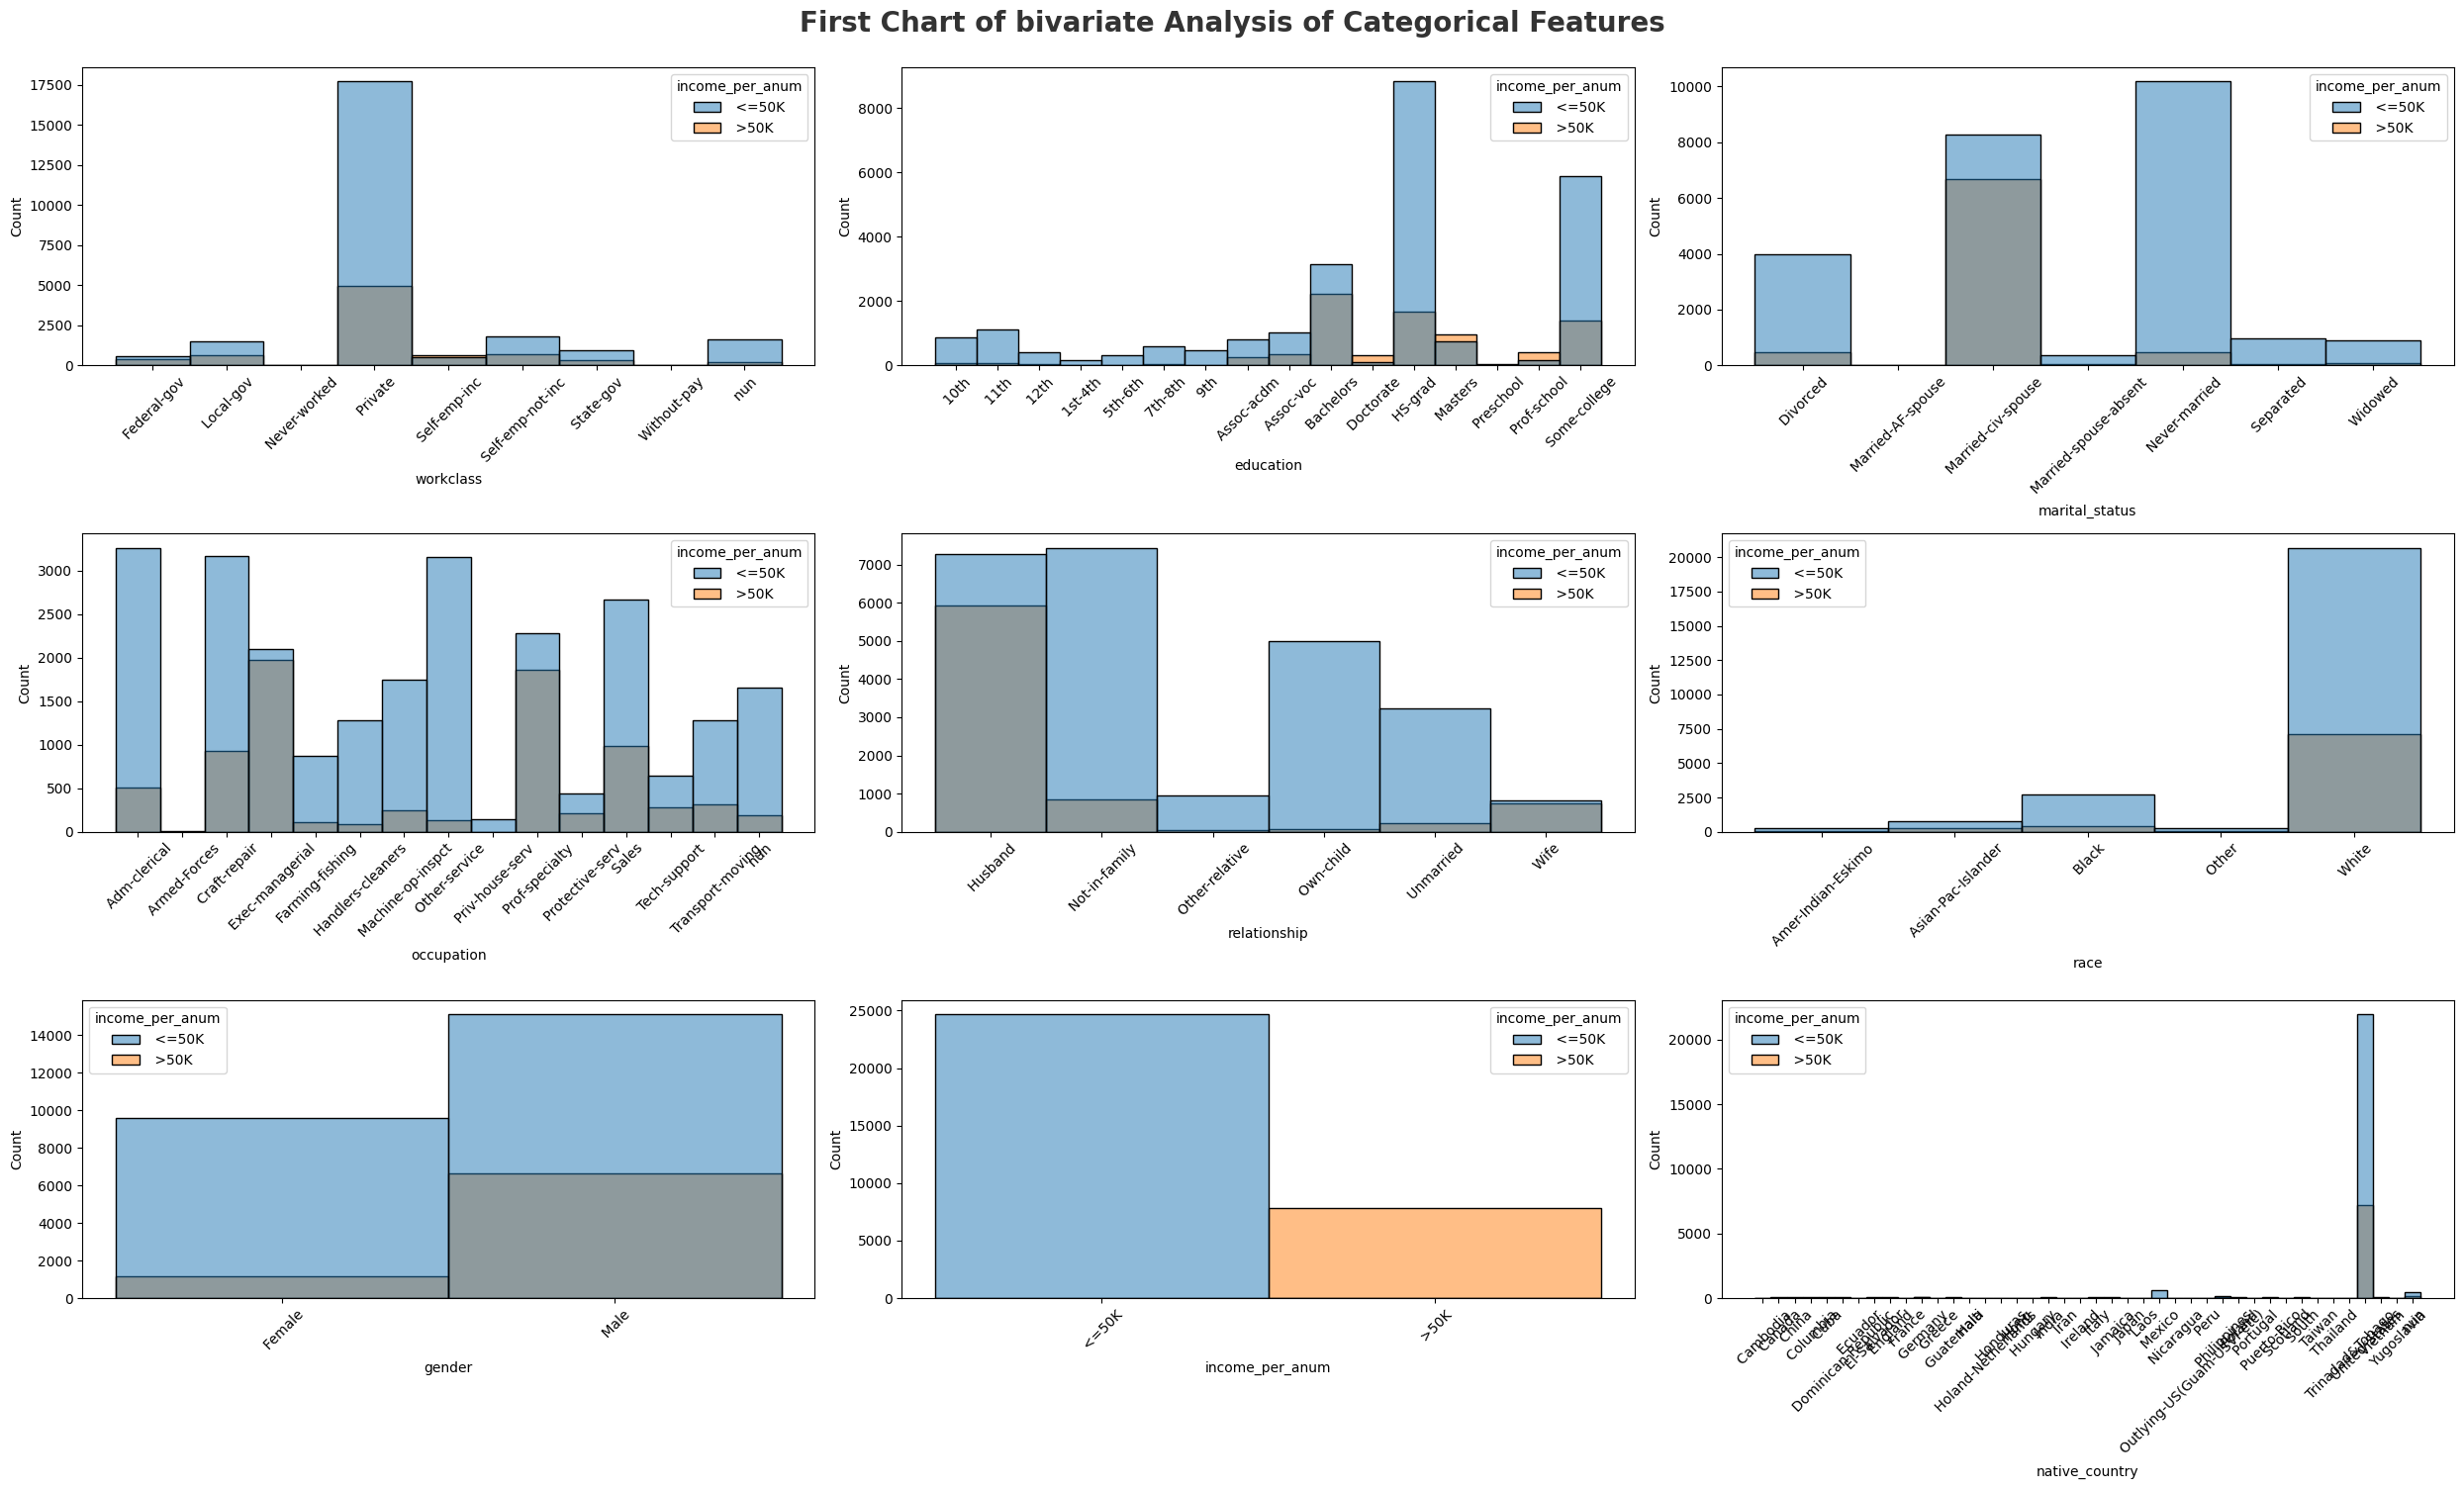

In [61]:
# plot for categorical columns
plt.figure(figsize=(25, 15))
plt.suptitle('First Chart of bivariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1)
category = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'income_per_anum', 'native_country']
for i in range(0, len(category)):
    plt.subplot(3, 3, i+1)
    #sns.countplot(x=census_clean[category[i]], palette="Set2")
    sns.histplot(data = census_clean, x = census_clean[category[i]], hue = "income_per_anum")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

Exploratory Data Analysis (EDA)

Variable Overview

In [62]:
categorical=census_clean.select_dtypes(exclude="number").columns
numerical=census_clean.select_dtypes(include='number').columns
print(categorical,'\n',numerical)

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'income_per_anum'],
      dtype='object') 
 Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


Observation:

Categorical Features:
1.workclass
2.education
3.marital_status
4.occupation
5.relationship
6.race
7.gender
8.native_country
9.income_per_anum

Numerical Features:
1.age
2.fnlwgt
3.education_num
4.capital_gain
5.capital_loss
6.hours_per_week

Categorical Features

Workclass

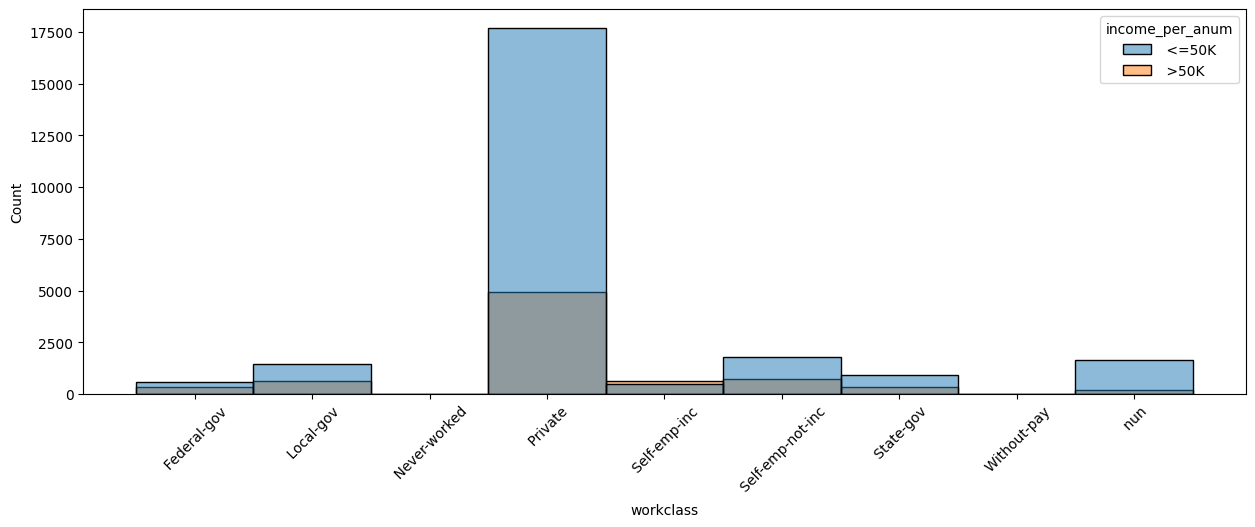

In [63]:
plt.figure(figsize=(15, 5))
sns.histplot(data = census_clean, x = "workclass", hue = "income_per_anum")
plt.xticks(rotation=45)
plt.show()

Observation:
   1.The workclass of most people is Private (74%)
   2.In private job most people's income are greater than 50k

Education

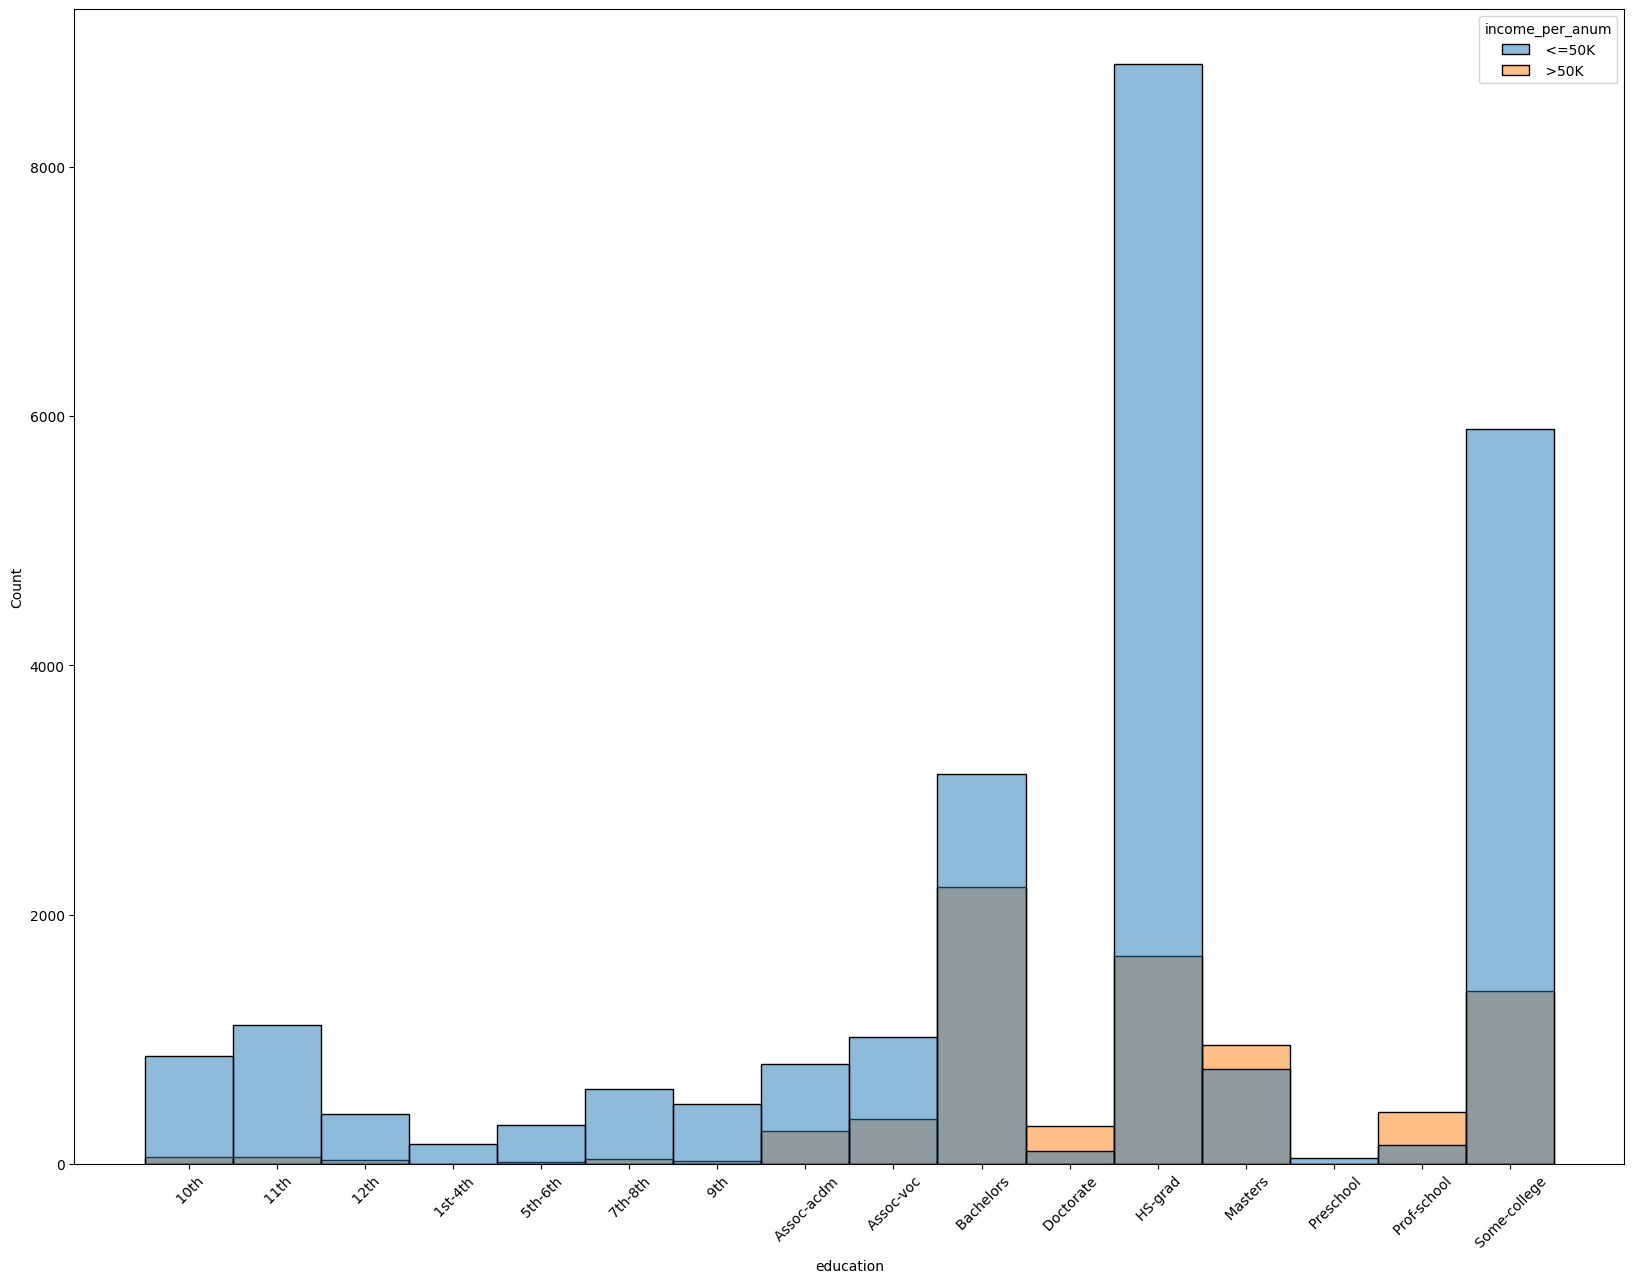

In [64]:
plt.figure(figsize=(20, 15))
sns.histplot(data = census_clean, x = "education", hue = "income_per_anum")
plt.xticks(rotation=45)
plt.show()

Observation
  1. For the people belonging to Bachelors, Masters, Doctorate and Prof-school category,there are more people earning more than 50K

Marital status

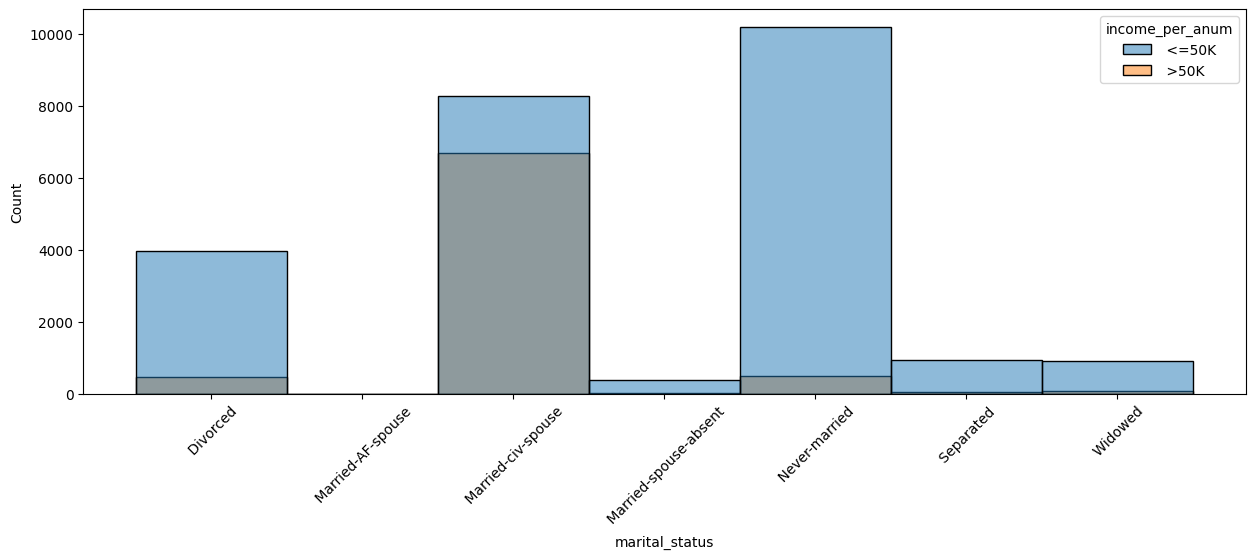

In [65]:
plt.figure(figsize=(15, 5))
sns.histplot(data = census_clean, x = "marital_status", hue = "income_per_anum")
plt.xticks(rotation=45)
plt.show()

Observation:
  1. The marital_status of most people earning more than 50K is Married-civ-spouse

Occupation

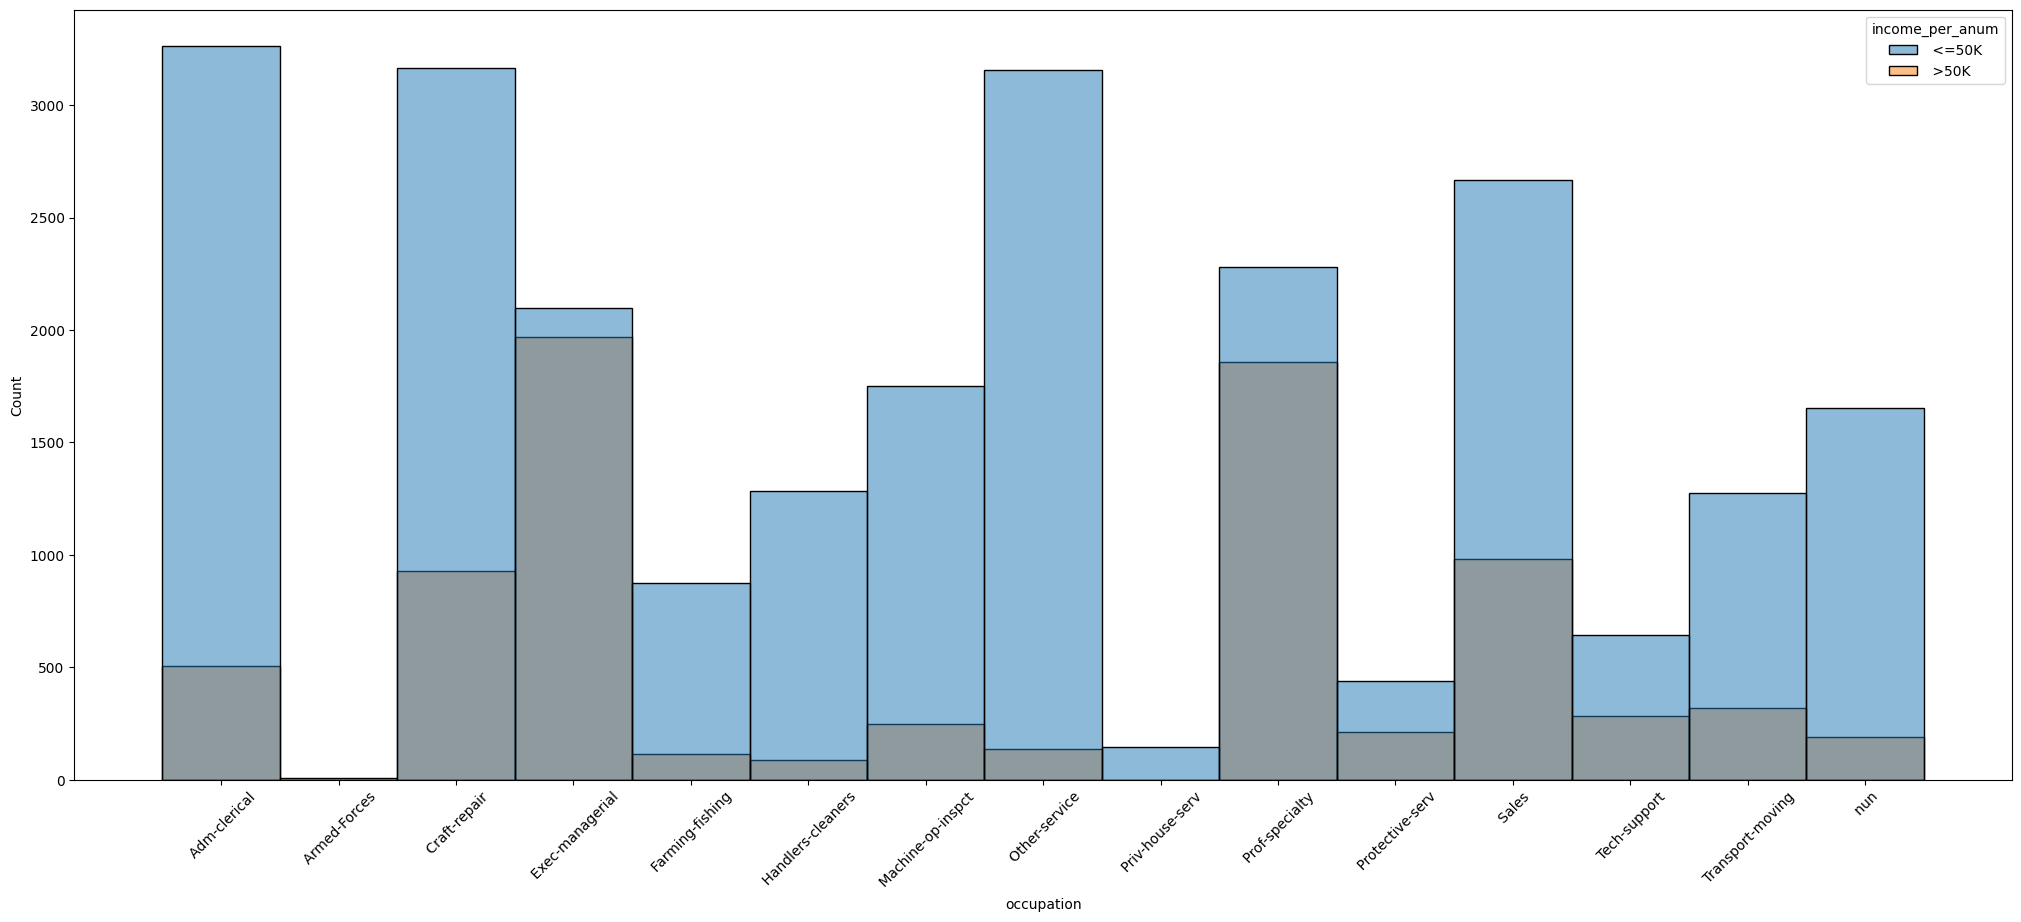

In [66]:
plt.figure(figsize=(25, 10))
sns.histplot(data = census_clean, x = "occupation", hue = "income_per_anum")
plt.xticks(rotation=45)
plt.show()

Observation:
   1.Adults in Exec-managerial and Pro-specialty roles are equally likely to earn more than 50K dollars an year

Relationship

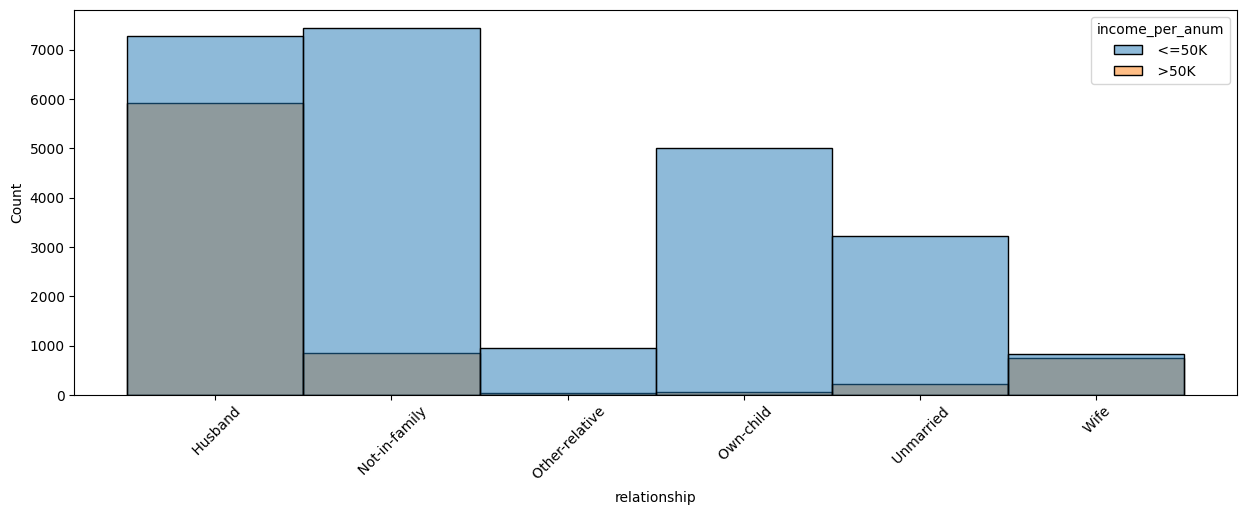

In [67]:
plt.figure(figsize=(15, 5))
sns.histplot(data = census_clean, x = "relationship", hue = "income_per_anum")
plt.xticks(rotation=45)
plt.show()

Observation:
  1. Husbands are earning more than $50K compare to all.

Race

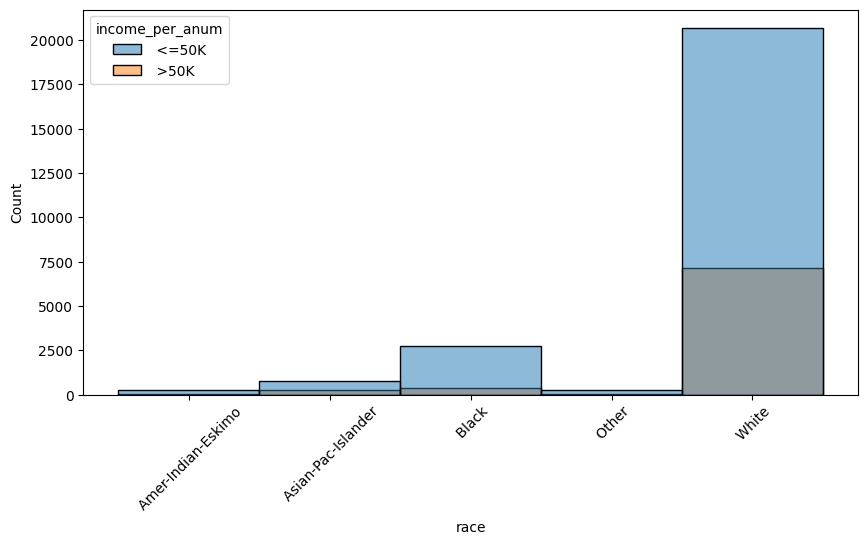

In [68]:
plt.figure(figsize=(10, 5))
sns.histplot(data = census_clean, x = "race", hue = "income_per_anum")
plt.xticks(rotation=45)
plt.show()

Observation:
  1. Most of the people surveyed are white
  2. People who earn more than 50k a year are mostly white

Gender

In [69]:
print(census_clean['gender'].value_counts())
print("-------------------------------")
print(f"average (mean) of male- {census_clean[census_clean['gender']==' Male']['age'].mean()}")
print(f"average (mean) of female- {census_clean[census_clean['gender']==' Female']['age'].mean()}")

 Male      21775
 Female    10762
Name: gender, dtype: int64
-------------------------------
average (mean) of male- 39.43605051664753
average (mean) of female- 36.864709161865825


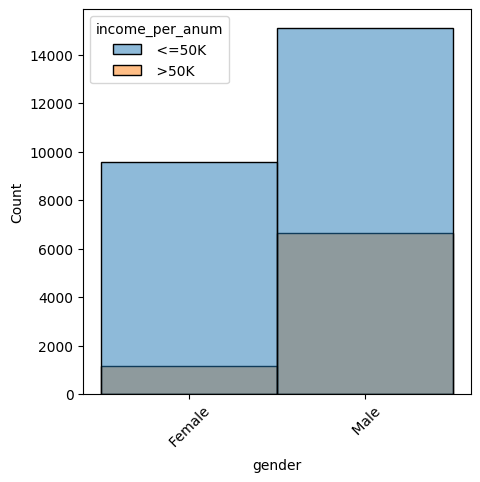

In [70]:
plt.figure(figsize=(5, 5))
sns.histplot(data = census_clean, x = "gender", hue = "income_per_anum")
plt.xticks(rotation=45)
plt.show()

Observation:
  1. The ratio of male to female is about 2:1
  2. The properation of earning more than 50K is higher in male
  3. average (mean) of male- 39.43605051664753
  4.average (mean) of female- 36.864709161865825

Native country

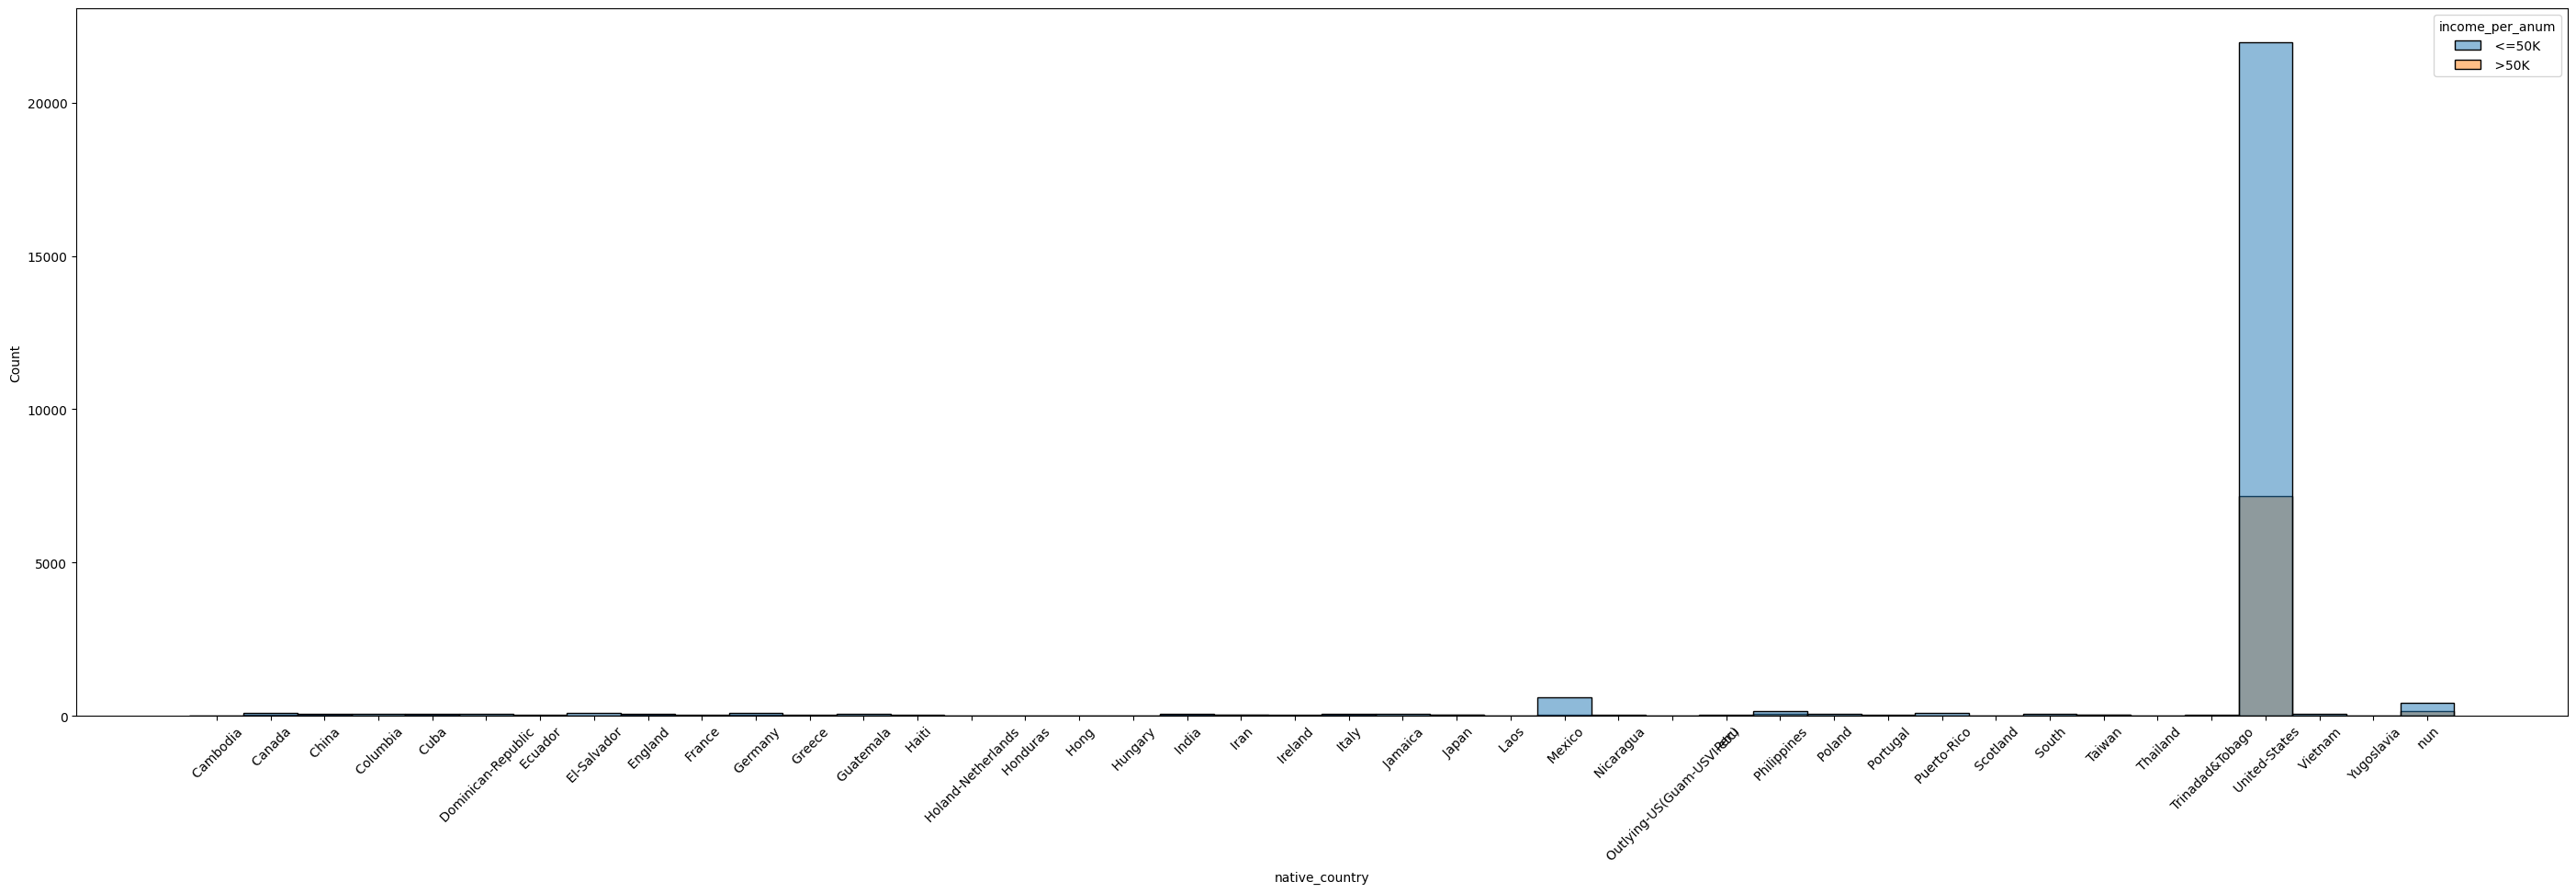

In [71]:
plt.figure(figsize=(35, 10))
sns.histplot(data = census_clean, x = "native_country", hue = "income_per_anum")
plt.xticks(rotation=45)
plt.show()

Observation:
   This data has many countries but most of the people belongs to United- States

Some other analysis

In [72]:
# analysing the relation between age and income per anum
age_rich = census_clean.loc[census_clean['income_per_anum'] == " >50K",'age']
age_poor = census_clean.loc[census_clean['income_per_anum'] == " <=50K",'age']
print(f"The average age of rich people are {round(age_rich.mean())}+-{round(age_rich.std())} and average of poor people are {round(age_poor.mean())}+-{round(age_poor.std())}")

The average age of rich people are 44+-11 and average of poor people are 37+-14


<Axes: xlabel='income_per_anum', ylabel='age'>

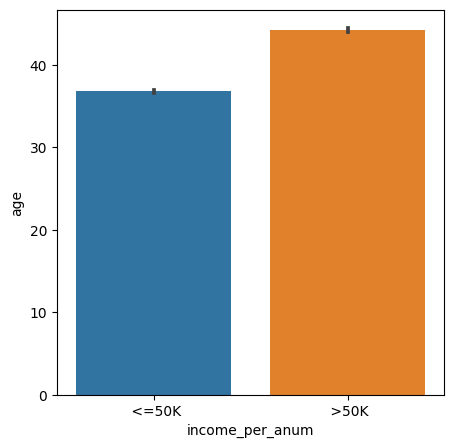

In [73]:
plt.figure(figsize=(5, 5))
sns.barplot(x='income_per_anum', y='age', data=census_clean)

Observation- In above analysis average  age of people, who's income is greater than 50K is 44+-11 and average of peoples who's income is less than 50K is 37+-14.

Numerical features

Density

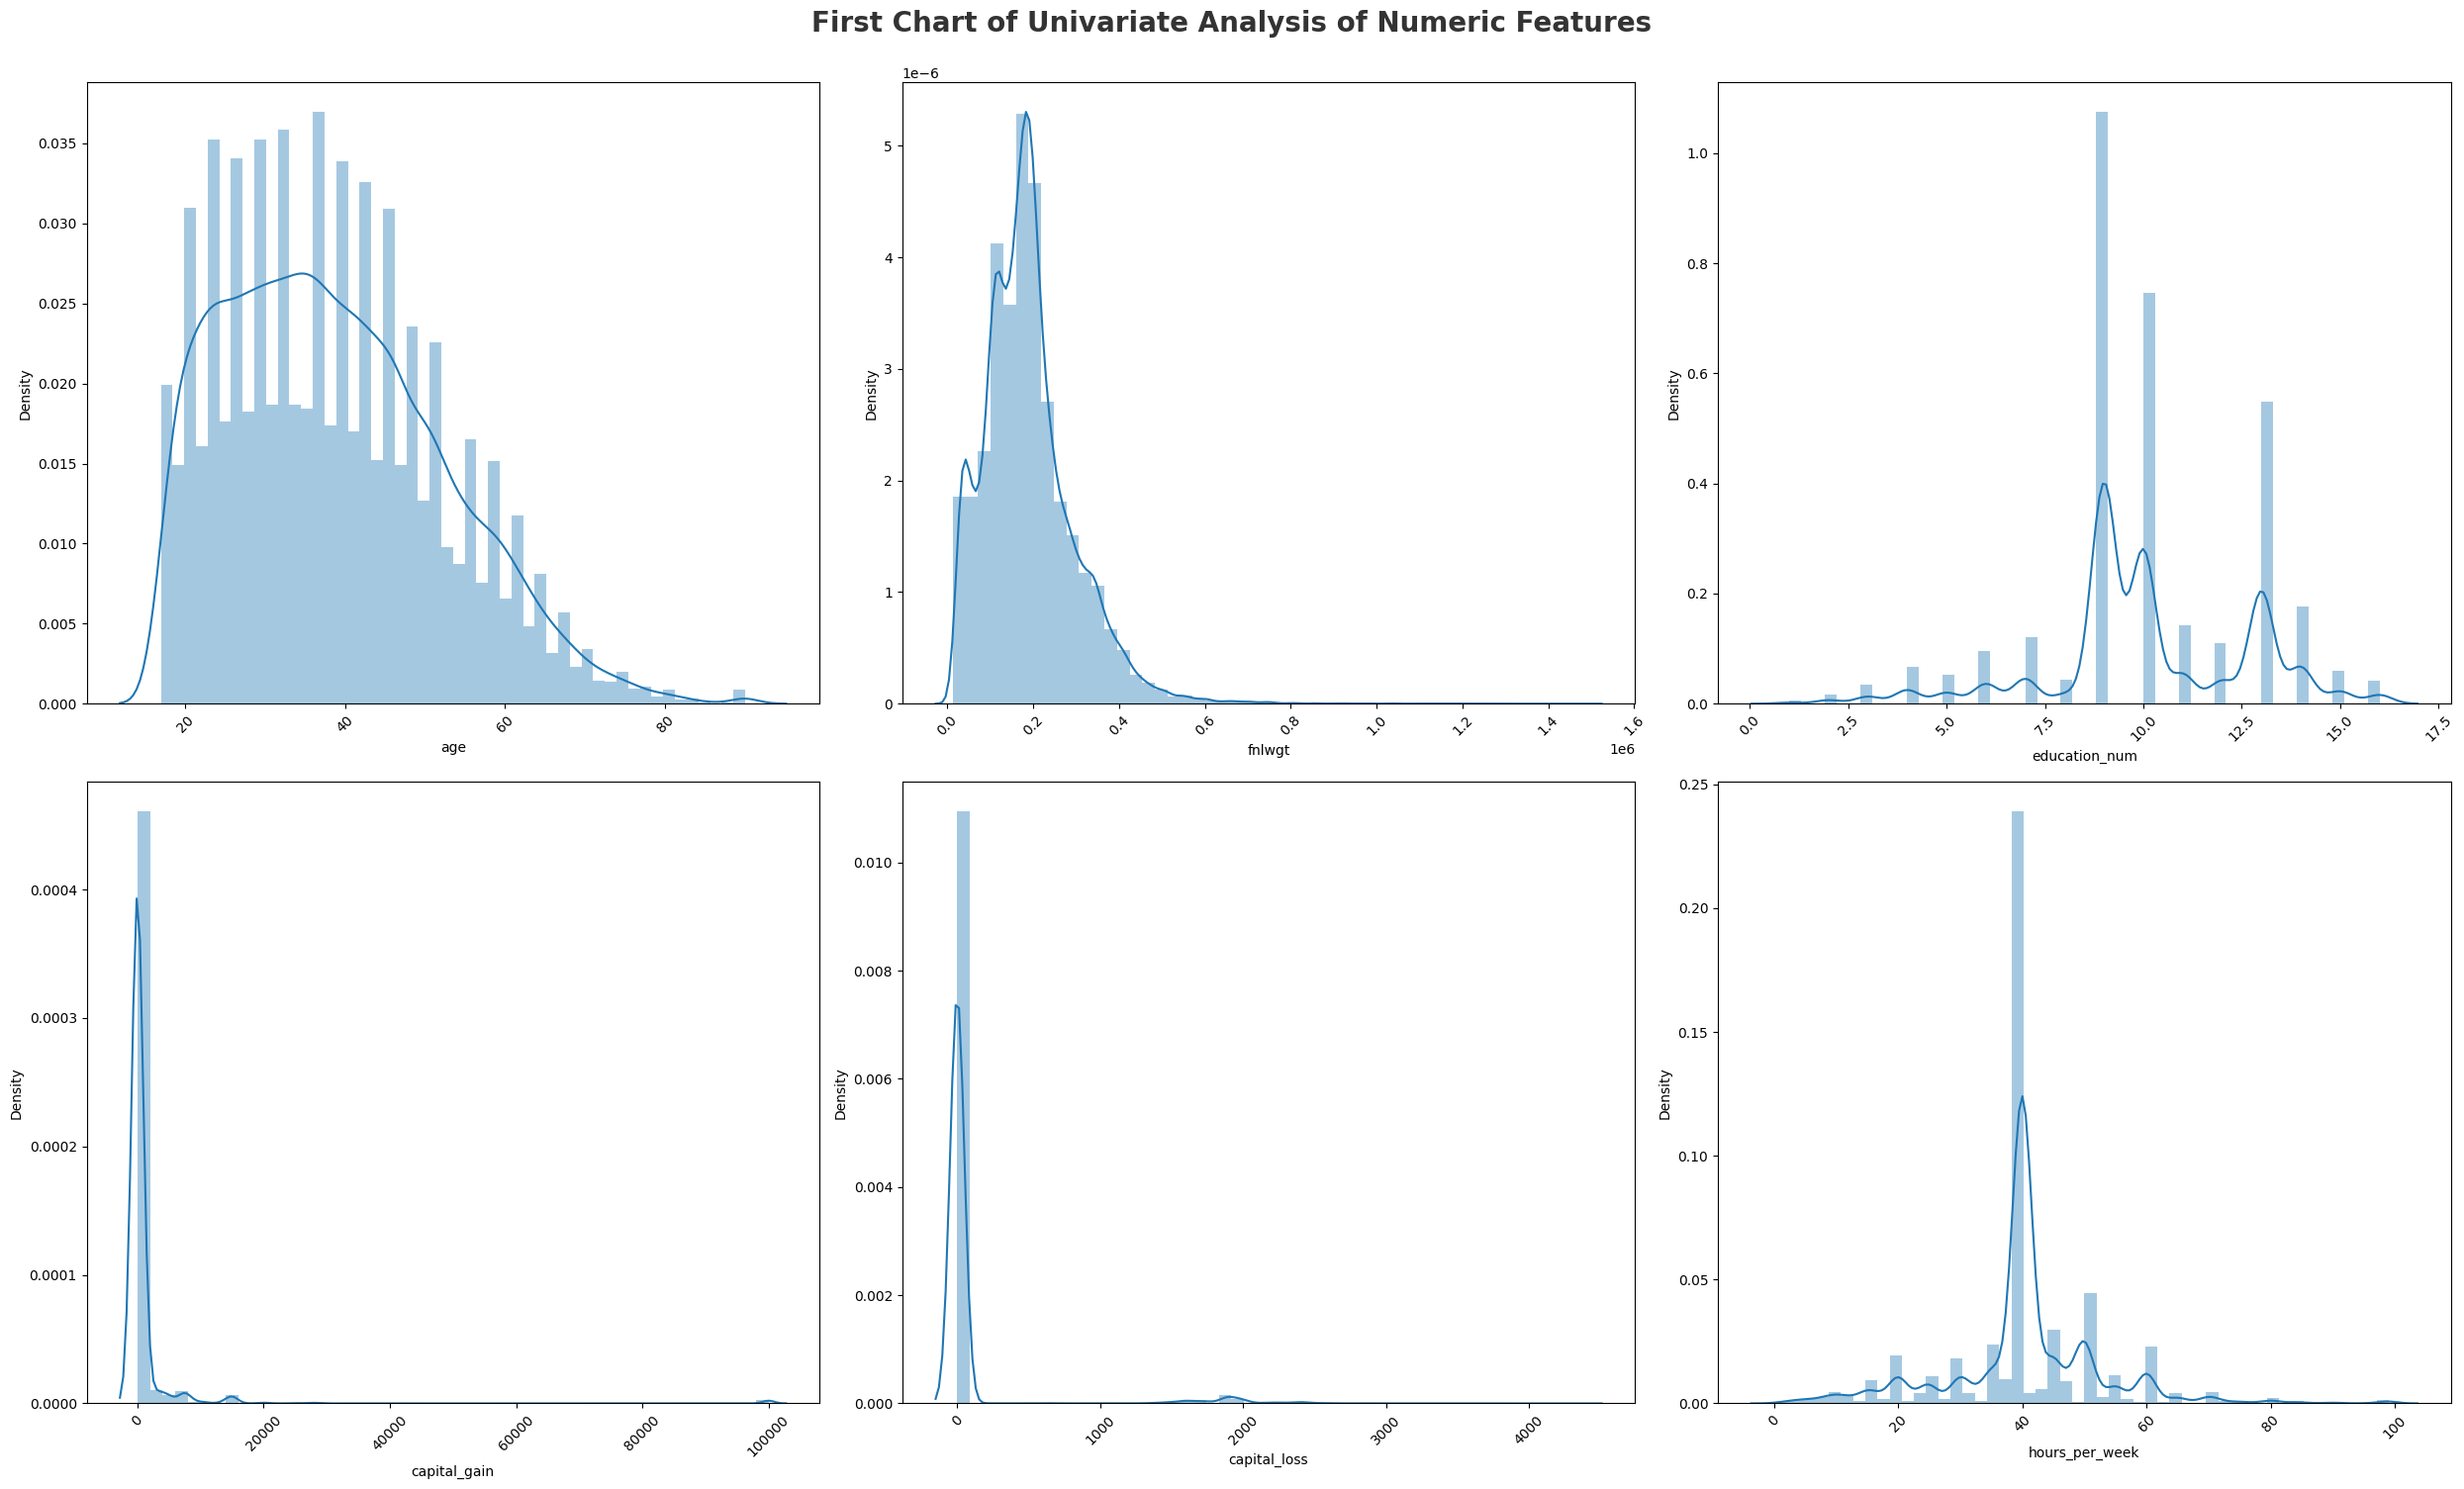

In [74]:
# plot for numerical columns
plt.figure(figsize=(25, 15))
plt.suptitle('First Chart of Univariate Analysis of Numeric Features', fontsize=20, fontweight='bold', alpha=0.8,y=1)
numeric = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for i in range(0, len(numeric)):
    plt.subplot(2, 3, i+1)
    sns.distplot(x=census_clean[numeric[i]])
    plt.xlabel(numeric[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

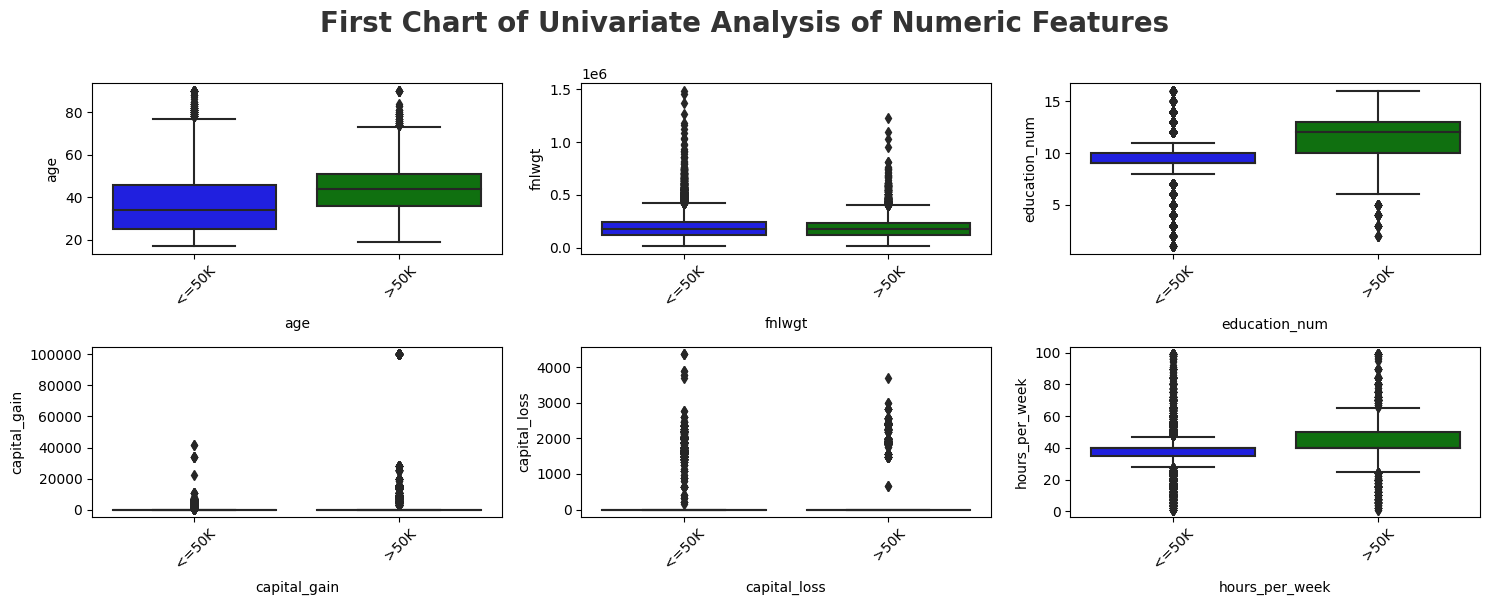

In [79]:
# plot for numerical columns
plt.figure(figsize=(15, 6))
plt.suptitle('First Chart of Univariate Analysis of Numeric Features', fontsize=20, fontweight='bold', alpha=0.8,y=1)
numeric = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for i in range(0, len(numeric)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=census_clean, y=census_clean[numeric[i]], x='income_per_anum', palette=['b', 'g'])
    plt.xlabel(numeric[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

Observation:
   1. density of people is more who's age is approximately between 20 to 45
   2. Those people who earn less than $50k have average education is 10th, while who earn more thn $50k have average education approximately 13
   3. capital gain and capital loss are concentrated on zero
   4. people who work 40 hours per week earn leass tah $50k, while who earn more than $50k work approximately 50 hours per week
   4. There are some outliers in every numerical features